# Check label balance

Most Frequent Label: 10.05%
Least Frequent Label: 9.93%


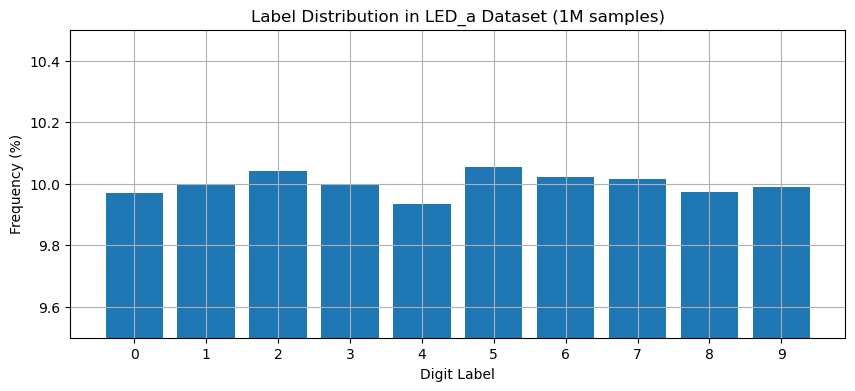

In [22]:
from river.datasets import synth
from collections import Counter
import matplotlib.pyplot as plt

# Generate LED_a dataset (abrupt drift simulation)
dataset = synth.LEDDrift(
    seed=112,
    noise_percentage=0.1,
    irrelevant_features=True,
    n_drift_features=7
).take(1_000_000)

# Count label occurrences
label_counts = Counter()
for _, y in dataset:
    label_counts[y] += 1

# Calculate label frequency percentages
total = sum(label_counts.values())
label_percentages = {label: (count / total) * 100 for label, count in label_counts.items()}

# Print most and least frequent label percentages
mf_label = max(label_percentages.values())
lf_label = min(label_percentages.values())
print(f"Most Frequent Label: {mf_label:.2f}%")
print(f"Least Frequent Label: {lf_label:.2f}%")

# Plot label distribution
labels, percentages = zip(*sorted(label_percentages.items()))
plt.figure(figsize=(10, 4))
plt.bar(labels, percentages)
plt.xlabel("Digit Label")
plt.ylabel("Frequency (%)")
plt.title("Label Distribution in LED_a Dataset (1M samples)")
plt.ylim(9.5, 10.5)
plt.grid(True)
plt.xticks(labels)
plt.show()

[0] Accuracy: 0.00%
[100] Accuracy: 0.27%
[200] Accuracy: 0.46%
[300] Accuracy: 0.55%
[400] Accuracy: 0.60%
[500] Accuracy: 0.64%
[600] Accuracy: 0.66%
[700] Accuracy: 0.66%
[800] Accuracy: 0.67%
[900] Accuracy: 0.69%
[1000] Accuracy: 0.69%
[1100] Accuracy: 0.70%
[1200] Accuracy: 0.71%
[1300] Accuracy: 0.70%
[1400] Accuracy: 0.71%
[1500] Accuracy: 0.71%
[1600] Accuracy: 0.72%
[1700] Accuracy: 0.72%
[1800] Accuracy: 0.72%
[1900] Accuracy: 0.72%
[2000] Accuracy: 0.72%
[2100] Accuracy: 0.72%
[2200] Accuracy: 0.73%
[2300] Accuracy: 0.73%
[2400] Accuracy: 0.73%
[2500] Accuracy: 0.73%
[2600] Accuracy: 0.73%
[2700] Accuracy: 0.73%
[2800] Accuracy: 0.73%
[2900] Accuracy: 0.73%
[3000] Accuracy: 0.73%
[3100] Accuracy: 0.73%
[3200] Accuracy: 0.73%
[3300] Accuracy: 0.73%
[3400] Accuracy: 0.74%
[3500] Accuracy: 0.74%
[3600] Accuracy: 0.74%
[3700] Accuracy: 0.74%
[3800] Accuracy: 0.74%
[3900] Accuracy: 0.74%
[4000] Accuracy: 0.74%
[4100] Accuracy: 0.74%
[4200] Accuracy: 0.74%
[4300] Accuracy: 0.74%


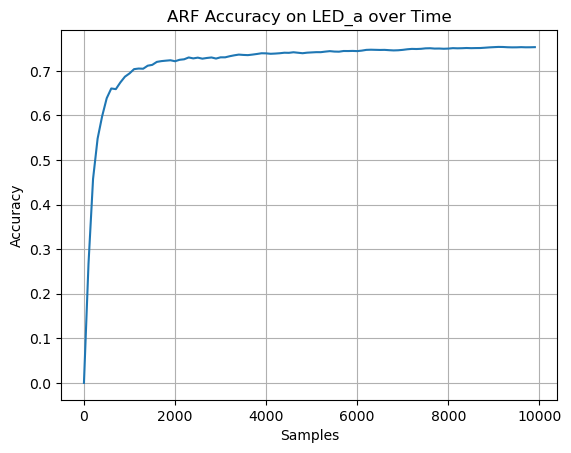


✅ Final Accuracy: 0.75%


In [31]:
from river import metrics
from river import forest
from river.datasets import synth
import matplotlib.pyplot as plt

arf = forest.ARFClassifier(n_models=100, seed=42)
metric = metrics.Accuracy()

accuracies = []
steps = []

for i, (x, y) in enumerate(
    synth.LEDDrift(
        seed=112,
        noise_percentage=0.1,
        irrelevant_features=True,
        n_drift_features=7
    # ).take(1_000_000)
    ).take(10000)
):
    y_pred = arf.predict_one(x)
    arf.learn_one(x, y)
    metric.update(y, y_pred)

    if i % 100 == 0:
        steps.append(i)
        accuracies.append(metric.get())
        print(f"[{i}] Accuracy: {metric.get():.2f}%")

plt.plot(steps, accuracies)
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.title("ARF Accuracy on LED_a over Time")
plt.grid(True)
plt.show()

print(f"\n✅ Final Accuracy: {metric.get():.2f}%")